In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import scipy.stats as st
from sklearn import metrics
import mpl_toolkits
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# Loading the data minding null values
data = pd.read_csv("PUF2018.csv", na_values = [9, ""], keep_default_na = False)

Loading data excluding 9 (since this represents imputed value/null in the dataset) and missing value

In [3]:
# Data exploration
data.head()

,CONTROL,SHIPMONTH,WEIGHT,WGTADJ,REGION,SECTIONS,STATUS,PRICE,SQFT,BEDROOMS,...,FOUNDATION,SECURED,JSTATUS,JPRICE,JSQFT,JBEDROOM,JTITLE,JLOCATION,JFOUNDATION,JSECURED
0,18010001,201801,54.2857,0.9682,3,1,2,34900.0,1100.0,3.0,...,3.0,1.0,R,R,R,R,R,R,R,R
1,18010002,201801,54.2857,0.9682,3,1,2,27700.0,680.0,1.0,...,3.0,1.0,R,R,R,R,R,R,R,R
2,18010003,201801,16.8842,0.9682,4,1,2,97000.0,770.0,1.0,...,2.0,1.0,R,R,R,R,R,R,R,R
3,18010004,201801,16.8842,0.9682,4,1,2,61000.0,530.0,1.0,...,2.0,1.0,R,R,R,R,R,R,R,R
4,18010005,201801,54.2857,0.9682,4,1,2,34900.0,990.0,1.0,...,3.0,1.0,R,R,R,R,R,R,R,R


Checking the data

In [4]:
# Checking the shape of the data
data.shape

(6188, 22)

Checking the shape (rows and columns) of the data

In [5]:
# Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 22 columns):
CONTROL        6188 non-null int64
SHIPMONTH      6188 non-null int64
WEIGHT         6188 non-null float64
WGTADJ         6188 non-null float64
REGION         6188 non-null int64
SECTIONS       6188 non-null int64
STATUS         6188 non-null int64
PRICE          4662 non-null float64
SQFT           4791 non-null float64
BEDROOMS       4791 non-null float64
TITLED         3068 non-null float64
LOCATION       3068 non-null float64
FOUNDATION     3068 non-null float64
SECURED        1216 non-null float64
JSTATUS        6188 non-null object
JPRICE         4662 non-null object
JSQFT          4791 non-null object
JBEDROOM       4791 non-null object
JTITLE         3068 non-null object
JLOCATION      3068 non-null object
JFOUNDATION    3068 non-null object
JSECURED       3068 non-null object
dtypes: float64(9), int64(5), object(8)
memory usage: 1.0+ MB


 17 continuous variables (5 int and 12 float) & 8 character variables

In [6]:
# Creating separate dataframe for int and character datatypes columns
data1 = pd.DataFrame(data, columns = ['PRICE', 'SQFT'])
data2 = pd.DataFrame(data, columns = ['BEDROOMS', 'TITLED', 'LOCATION', 'FOUNDATION', 'SECURED'])

In [7]:
# Checking the continuous dataframe
data1

,PRICE,SQFT
0,34900.0,1100.0
1,27700.0,680.0
2,97000.0,770.0
3,61000.0,530.0
4,34900.0,990.0
...,...,...
6183,NaN,NaN
6184,NaN,NaN
6185,NaN,NaN
6186,NaN,NaN


In [8]:
# Missing value count
data1.isnull().sum()

PRICE    1526
SQFT     1397
dtype: int64

In [9]:
# Missing value percentage
percent_missing = data1.isnull().sum() * 100 / len(data1)
print(round(percent_missing,2))

PRICE    24.66
SQFT     22.58
dtype: float64


In [10]:
# Imputing null values with mean for integer type missing values
data1.fillna(data.mean(), inplace=True)

In [11]:
# Checking null value again after imputation
data1.isnull().sum()

PRICE    0
SQFT     0
dtype: int64

In [12]:
# Checking 2nd dataframe containing continuous variables
data2

,BEDROOMS,TITLED,LOCATION,FOUNDATION,SECURED
0,3.0,2.0,3.0,3.0,1.0
1,1.0,2.0,3.0,3.0,1.0
2,1.0,2.0,1.0,2.0,1.0
3,1.0,2.0,1.0,2.0,1.0
4,1.0,2.0,3.0,3.0,1.0
...,...,...,...,...,...
6183,NaN,NaN,NaN,NaN,NaN
6184,NaN,NaN,NaN,NaN,NaN
6185,NaN,NaN,NaN,NaN,NaN
6186,NaN,NaN,NaN,NaN,NaN


In [13]:
# Checking null values
data2.isnull().sum()

BEDROOMS      1397
TITLED        3120
LOCATION      3120
FOUNDATION    3120
SECURED       4972
dtype: int64

Count of null values

In [14]:
# Missing value percentage
per_missing = data2.isnull().sum() * 100 / len(data2)
print(round(per_missing,2))

BEDROOMS      22.58
TITLED        50.42
LOCATION      50.42
FOUNDATION    50.42
SECURED       80.35
dtype: float64


Missing count %ge. 'SECURED' has 80% missing data hence can be dropped. 'TITLED', 'LOCATION' and 'FOUNDATION' have 50%
missing data as well but being retained in absence of any other attributes.

In [15]:
# Imputing mode to all the columns of the Data2 for categorical data
for column in data2.columns:
    data2[column].fillna(data2[column].mode()[0], inplace=True)

In [16]:
data2

,BEDROOMS,TITLED,LOCATION,FOUNDATION,SECURED
0,3.0,2.0,3.0,3.0,1.0
1,1.0,2.0,3.0,3.0,1.0
2,1.0,2.0,1.0,2.0,1.0
3,1.0,2.0,1.0,2.0,1.0
4,1.0,2.0,3.0,3.0,1.0
...,...,...,...,...,...
6183,3.0,2.0,3.0,3.0,1.0
6184,3.0,2.0,3.0,3.0,1.0
6185,3.0,2.0,3.0,3.0,1.0
6186,3.0,2.0,3.0,3.0,1.0


In [17]:
# Checking Null count after imputation
data2.isnull().sum()

BEDROOMS      0
TITLED        0
LOCATION      0
FOUNDATION    0
SECURED       0
dtype: int64

In [18]:
# Merging both dataframe
Clean_data = pd.concat([data1, data2], axis=1, sort=False)

In [19]:
# Checking the data
Clean_data

,PRICE,SQFT,BEDROOMS,TITLED,LOCATION,FOUNDATION,SECURED
0,34900.000000,1100.000000,3.0,2.0,3.0,3.0,1.0
1,27700.000000,680.000000,1.0,2.0,3.0,3.0,1.0
2,97000.000000,770.000000,1.0,2.0,1.0,2.0,1.0
3,61000.000000,530.000000,1.0,2.0,1.0,2.0,1.0
4,34900.000000,990.000000,1.0,2.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...
6183,88585.263835,1499.759967,3.0,2.0,3.0,3.0,1.0
6184,88585.263835,1499.759967,3.0,2.0,3.0,3.0,1.0
6185,88585.263835,1499.759967,3.0,2.0,3.0,3.0,1.0
6186,88585.263835,1499.759967,3.0,2.0,3.0,3.0,1.0


In [20]:
# Checking shape of the data
Clean_data.shape

(6188, 7)

In [21]:
# Checking datatype
Clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 7 columns):
PRICE         6188 non-null float64
SQFT          6188 non-null float64
BEDROOMS      6188 non-null float64
TITLED        6188 non-null float64
LOCATION      6188 non-null float64
FOUNDATION    6188 non-null float64
SECURED       6188 non-null float64
dtypes: float64(7)
memory usage: 338.5 KB


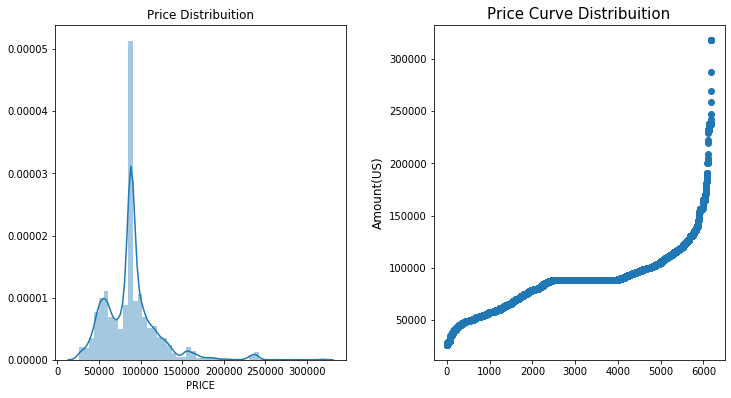

In [22]:
# Understanding the Price variable
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Price Distribuition')
sns.distplot(Clean_data['PRICE'])

plt.subplot(122)
g1 = plt.scatter(range(Clean_data.shape[0]), np.sort(Clean_data.PRICE.values))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

1. Most of the house prices fall in the $50k - $100k bracket.
2. Highend houses (>$150k) are significantly lower.

In [23]:
# Understanding statistics 
Clean_data.describe()

,PRICE,SQFT,BEDROOMS,TITLED,LOCATION,FOUNDATION,SECURED
count,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000
mean,88585.263835,1499.759967,2.737880,1.943762,2.540724,2.645928,1.003555
std,32963.318622,388.147999,0.674987,0.367244,0.841268,0.715483,0.084256
min,26400.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,67000.000000,1200.000000,3.000000,2.000000,3.000000,3.000000,1.000000
50%,88585.263835,1499.759967,3.000000,2.000000,3.000000,3.000000,1.000000
75%,99000.000000,1600.000000,3.000000,2.000000,3.000000,3.000000,1.000000
max,318000.000000,3500.000000,3.000000,3.000000,3.000000,3.000000,3.000000


1. Standard deviation of 'SECURED' is very low at 0.08 with min as 1 and max as 3 and this is quite understandable since 80% data were missing and got imputed.
2. Minimum square footage of the house in the dataset is of 480 SFT while the biggest house is of 3500 SFT.
3. Average area in the house is approx. 1500 SFT.

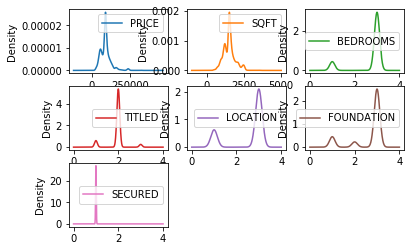

In [24]:
# Density plot to understand variation ----- ANYTHING TO BE DROPPED
K=Clean_data.plot(kind='density',subplots=True,layout=(3,3),sharex=False,sharey=False)

1. PRICE, SQFT, TITLED and SECURED are having almost normal distribution.
2. Negative skewness is being observed for BEDROOMS,LOCATION and FOUNDATION

<Figure size 576x360 with 0 Axes>

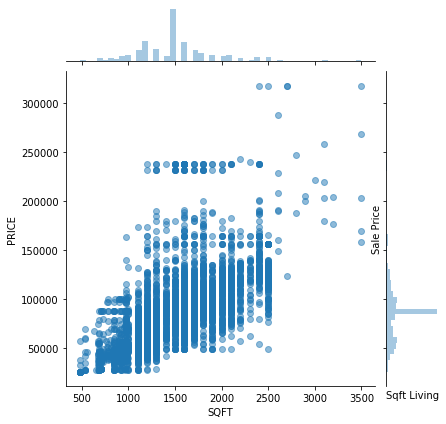

In [25]:
# Plotting relationship between PRICE and SQFT
plt.figure(figsize = (8, 5))
sns.jointplot(Clean_data.SQFT, Clean_data.PRICE, 
              alpha = 0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

1. With increase in SFT of house price is increasing
2. Most of the house are having SFT  close to 1500 SFT

Bedrooms counting: 
3.0    5377
1.0     811
Name: BEDROOMS, dtype: int64


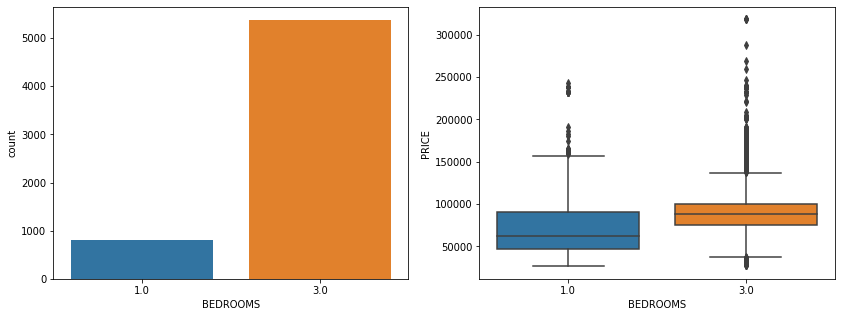

In [26]:
# Price trend based on number of bedrooms and SQFT of the house
BEDROOMS = Clean_data['BEDROOMS'].value_counts()

print("Bedrooms counting: ")
print(BEDROOMS)

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sns.countplot(x='BEDROOMS', data=Clean_data, ax=ax[0])
sns.boxplot(x='BEDROOMS', y= 'PRICE',
            data=Clean_data, ax=ax[1])
plt.show()

1. Type 3 bedroom type houses are highest.
2. Median range of price of Type 3 bedroom houses are higher than the Type 1 bedroom houses

C:\Users\rohit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x576 with 0 Axes>

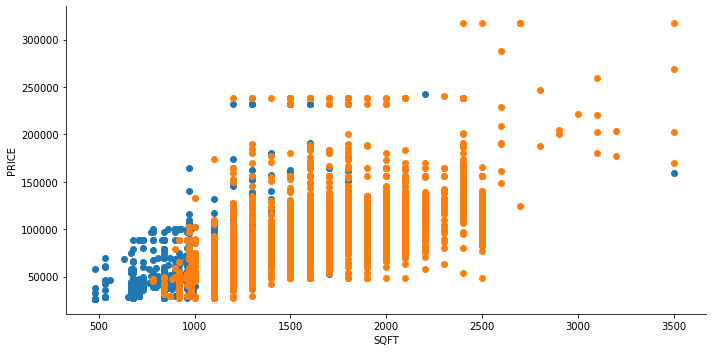

In [27]:
# Plotting price trend based on number of bedrooms and SQFT of the house
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=Clean_data, hue='BEDROOMS',size= 5, aspect=2)
g.map(plt.scatter, 'SQFT', 'PRICE')
plt.show()

Price of houses with more bedrooms is increasing with square footage of the house.

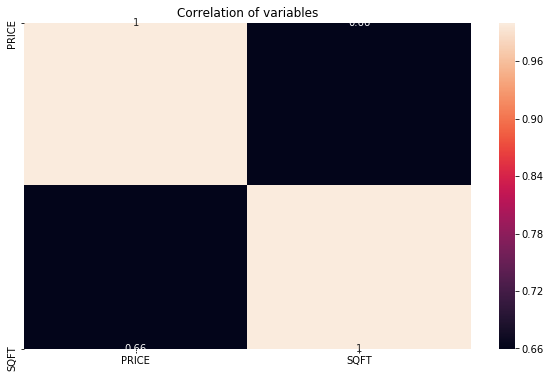

In [28]:
#Correlation matrix of continuous variables.
corr = Clean_data[['PRICE','SQFT']]
plt.figure(figsize=(10,6))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

The features of interest are the ones with a high correlation with the target variable ‘PRICE’ (only continuous variable in the datset). From the correlation matrix, we can see that this condition is achieved for 'SQFT' variables (continuous).

In [29]:
# Checking the headers
Clean_data.columns


Index(['PRICE', 'SQFT', 'BEDROOMS', 'TITLED', 'LOCATION', 'FOUNDATION',
       'SECURED'],
      dtype='object')

In [30]:
#Separating the attributes from the predicting attribute i.e.PRICE and dropping SECURED column 
#with 80% missing value
Clean_data.drop(['SECURED'], axis=1, inplace=True)

In [31]:
# Feature selection
features =  list(Clean_data.drop(['PRICE'],axis=1))
y = Clean_data.PRICE
x = Clean_data[features]

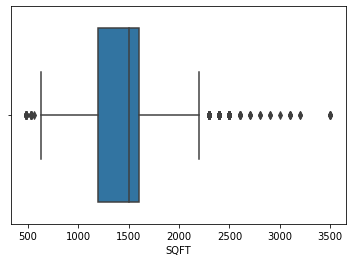

In [32]:
# Checking outliers
import seaborn as sns
sns.boxplot(data=Clean_data,x=Clean_data['SQFT'])


1. Any datappoints below the min or exceeding the max are outliers.
2. However, in the house price also depends on location and at a prime location, less square footage of house can cost more. Hence outlier treatment is not being performed.

In [33]:
#Initialize the linear regression model
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [34]:
# Importing libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error,r2_score, mean_squared_error #To evaluate our model



In [35]:
#Split the data into 67% training and 33% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [37]:
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [38]:
#Train/fit our model with the training data
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Finding the coefficient of the dataframe
coeff_df = pd.DataFrame(reg.coef_, x.columns, columns=['Coefficient'])  
coeff_df


,Coefficient
SQFT,24397.855797
BEDROOMS,-3978.301328
TITLED,-791.582824
LOCATION,-3245.714684
FOUNDATION,-2765.802443


In [40]:
# stats model
import statsmodels.api as sm

In [41]:
model = sm.OLS(y_train,x_train).fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.059
Model:                            OLS   Adj. R-squared (uncentered):              0.058
Method:                 Least Squares   F-statistic:                              51.72
Date:                Tue, 14 Apr 2020   Prob (F-statistic):                    3.49e-52
Time:                        22:43:20   Log-Likelihood:                         -53284.
No. Observations:                4145   AIC:                                  1.066e+05
Df Residuals:                    4140   BIC:                                  1.066e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           2.44e+04   1623.633     15.027      0.000    2.12e+04    2.76e+04
x2         -3978.3013   1617.818     -2.459      0.014   -7150.093    -806.510
x3          -791.5828   1501.340     -0.527      0.598   -3735.016    2151.850
x4         -3245.7147   1511.737     -2.147      0.032   -6209.531    -281.898
x5         -2765.8024   1541.788     -1.794      0.073   -5788.535     256.930
==============================================================================
Omnibus:                     2353.511   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29722.296
Skew:                           2.461   Prob(JB):                         0.00
Kurtosis:                      15.160   Cond. No.                         1.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Comparision between actual and predicted
y_pred = reg.predict(x_test)

In [44]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df
df1

,Actual,Predicted
996,110000.000000,84155.048504
468,88585.263835,84140.152460
3094,86000.000000,125026.730843
3605,105000.000000,115184.157026
2077,60000.000000,64256.932262
4701,80000.000000,104047.467183
2377,99000.000000,110460.559932
2707,77000.000000,66790.520371
1454,88585.263835,84140.152460
2977,58000.000000,59331.761687


In [45]:
# Error computation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14351.104333339455
Mean Squared Error: 484364372.7479609
Root Mean Squared Error: 22008.279640807024


In [46]:
#To check model performance/accuracy using,
# mean squared error which tells how close a regression line is to a set of points.
from sklearn.metrics import r2_score

#  Mean squared error by sklearn 
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))


484364372.7479609


In [47]:
# Trying more complex algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
models = [RandomForestRegressor(n_estimators=200,criterion='mse',max_depth=20,random_state=100),DecisionTreeRegressor(criterion='mse',max_depth=11,random_state=100),GradientBoostingRegressor(n_estimators=200,max_depth=12)]
learning_mods = pd.DataFrame()
temp = {}

In [48]:
#print the actual price of houses from the testing data set
y_test

996     110000.000000
468      88585.263835
3094     86000.000000
3605    105000.000000
2077     60000.000000
            ...      
366      88585.263835
2132     88585.263835
1432     88585.263835
5324     59000.000000
4320     66000.000000
Name: PRICE, Length: 2043, dtype: float64

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)
score on training 0.6038962844201998
r2 score 0.4669698704256544
DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=100, splitter='best')
score on training 0.6074159879476192
r2 score 0.43261529841672053
GradientBoostingRegressor(alpha=0.9, criterion='friedm

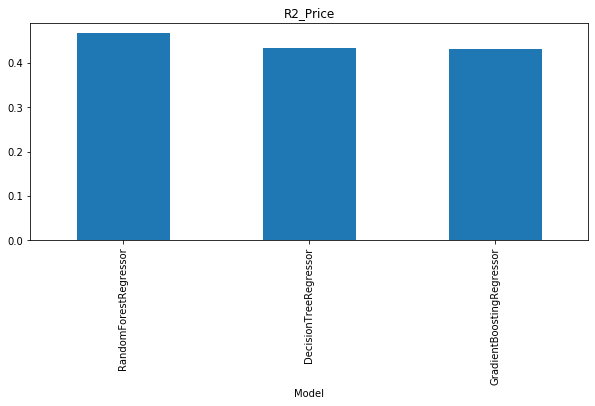

In [49]:
#run through models
for model in models:
    print(model)
    m = str(model)
    temp['Model'] = m[:m.index('(')]
    model.fit(x_train, y_train)
    temp['R2_Price'] = r2_score(y_test, model.predict(x_test))
    print('score on training',model.score(x_train, y_train))
    print('r2 score',r2_score(y_test, model.predict(x_test)))
    learning_mods = learning_mods.append([temp])
learning_mods.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
learning_mods.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()

Neural Network, SVR,
MSE comparison... Lasso regression -
LR, 2 ways - Bias issue 1 to takeSimplest model,
MSE N Rsq close to 1 
Most likely bias - major issue
Algorithm not able to do justice and fit properly, detect the pattern of the data
Hence more complex models---- name
Error comparison
Data is still underfitting, data is insufficient to capture variation in my target variable
As of now I have data constraint (data.gov), adding more features and records might address the issue.

Variable such as ..... potentially impact the target variable

OneHotEncoding - Categorical Variable


All RandomForestRegression has highest r2 at  0.47


In [50]:
# Load libraries
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

Scaled_Ridge: 0.463414 (+/- 0.032222)
Scaled_Lasso: 0.463444 (+/- 0.032149)
Scaled_Elastic: 0.403030 (+/- 0.035802)
Scaled_SVR: 0.438085 (+/- 0.035194)
Scaled_RF_reg: 0.445320 (+/- 0.055748)
Scaled_ET_reg: 0.419942 (+/- 0.059918)
Scaled_BR_reg: 0.445269 (+/- 0.055326)
Scaled_Hub-Reg: 0.452322 (+/- 0.036483)
Scaled_BayRidge: 0.463428 (+/- 0.032255)
Scaled_XGB_reg: 0.433814 (+/- 0.052457)
Scaled_DT_reg: 0.412215 (+/- 0.057479)
Scaled_KNN_reg: 0.425598 (+/- 0.050134)
Scaled_ADA-Reg: 0.285688 (+/- 0.064386)
Scaled_Gboost-Reg: 0.500340 (+/- 0.022720)
Scaled_RFR_PCA: 0.445349 (+/- 0.047999)
Scaled_XGBR_PCA: 0.418332 (+/- 0.052670)


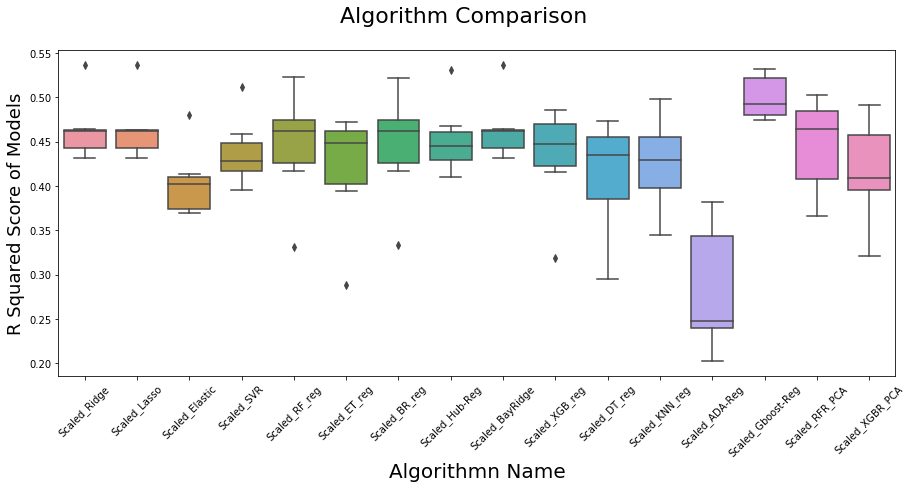

In [60]:
# Using pipeline for further complex algorithms
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
pipelines.append(
               ("Scaled_ADA-Reg",
                Pipeline([
                    ("Scaler", StandardScaler()),
                    ("ADA-reg", AdaBoostRegressor())
                ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()



Scaled Gboost regression is the best model with R squared error at 0.50

Scaled_Ridge: 3.243899 (+/- 0.000000)
Scaled_Lasso: 3.244108 (+/- 0.000000)
Scaled_Elastic: 2.821213 (+/- 0.000000)
Scaled_SVR: 3.066598 (+/- 0.000000)
Scaled_RF_reg: 3.117238 (+/- 0.000000)
Scaled_ET_reg: 2.939592 (+/- 0.000000)
Scaled_BR_reg: 3.116884 (+/- 0.000000)
Scaled_Hub-Reg: 3.166256 (+/- 0.000000)
Scaled_BayRidge: 3.243996 (+/- 0.000000)
Scaled_XGB_reg: 3.036700 (+/- 0.000000)
Scaled_DT_reg: 2.873452 (+/- 0.000000)
Scaled_KNN_reg: 2.979188 (+/- 0.000000)
Scaled_ADA-Reg: 1.666766 (+/- 0.000000)
Scaled_Gboost-Reg: 3.505376 (+/- 0.000000)
Scaled_RFR_PCA: 3.074721 (+/- 0.000000)
Scaled_XGBR_PCA: 2.928321 (+/- 0.000000)


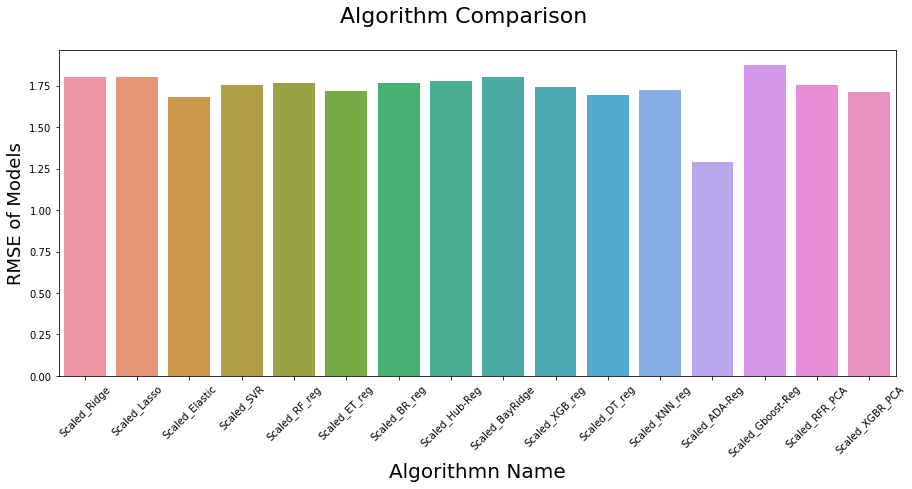

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

# mean_squared_error = mean_squared_error(y_test, y_pred)


scoring = 'neg_mean_squared_error'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = np.sum(cross_val_score(model, x_train, y_train, cv= kfold,
                                 scoring= None, n_jobs=-1)) 
    names.append(name)
    results.append(np.sqrt(cv_results))    
    msg = "%s: %f (+/- %f)" % (name, cv_results.sum(),  cv_results.std())
    print(msg)
   
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.barplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("RMSE of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [53]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [54]:
GBoost_Reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01,min_samples_split = 2,
                                       max_depth=7)
                                        

In [55]:
GBoost_Reg.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
y_hat = GBoost_Reg.predict(x_test)

In [57]:
GBoost_Reg.score(x_test,y_test)

0.4656849584088457